In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [1]:
from google.colab import files
uploaded = files.upload()

Saving earthquakes.csv to earthquakes.csv


In [5]:
data = pd.read_csv('earthquakes.csv')

In [6]:
data.head()

,id,magnitude,type,title,date,time,updated,url,detailUrl,felt,...,distanceKM,placeOnly,location,locality,what3words,timezone,locationDetails,year,month,day
0,us7000necw,4.8,earthquake,"M 4.8 - 33 km WSW of Ackerly, Texas",2024-09-17,00:49:42,1726583895255,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,1893,...,33,"WSW of Ackerly, Texas","Ackerly, Texas",Tarzan-Lenorah,landmass.perkily.affords,-300,"[{'id': '80684', 'wikidataId': '', 'name': '79...",2024,September,17
1,tx2024shcj,5.1,earthquake,"M 5.1 - 34 km WSW of Ackerly, Texas",2024-09-17,00:49:42,1726672002991,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,2042,...,34,"WSW of Ackerly, Texas","Ackerly, Texas",Tarzan-Lenorah,escalator.grownups.dwell,-300,"[{'id': '89341', 'wikidataId': '', 'name': '48...",2024,September,17
2,ci40734823,3.7,earthquake,"M 3.7 - 6 km N of Malibu, CA",2024-09-16,11:22:08,1726637414586,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,1580,...,6,"N of Malibu, CA","Malibu, CA",Agoura Hills-Malibu,clocking.uploaded.issuer,-420,"[{'id': '93478', 'wikidataId': 'Q844837', 'nam...",2024,September,16
3,tx2024scvz,3.9,earthquake,"M 3.9 - 58 km S of Whites City, New Mexico",2024-09-14,17:01:06,1726584426218,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,5,...,58,"S of Whites City, New Mexico","Whites City, New Mexico",Van Horn,sailboats.sawn.speeding,-300,"[{'id': '9', 'wikidataId': 'Q49', 'name': 'Nor...",2024,September,14
4,us7000ndte,4.1,earthquake,"M 4.1 - 60 km S of Whites City, New Mexico",2024-09-14,17:01:06,1726334616179,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,4,...,60,"S of Whites City, New Mexico","Whites City, New Mexico",Van Horn,spinners.downtime.computes,-300,"[{'id': '9', 'wikidataId': 'Q49', 'name': 'Nor...",2024,September,14


# Global Earthquake Distribution

In [13]:
# mapping out earthquakes on global map using plotly
import plotly.express as px

fig = px.scatter_geo(data,lat='latitude',lon='longitude',color='depth',size='magnitude',hover_name='place',hover_data={'magnitude': True,'depth': True,'date': True,},color_continuous_scale='Viridis',projection='natural earth',title='Global Earthquake Distribution',size_max=15)

fig.update_layout(legend_title='Depth', geo=dict(showland=True,landcolor='rgb(217, 217, 217)',showcountries=True,)
)

fig.show()

At global level, pacific ocean coastal areas are facing frequent earthquakes.

#Relation between Magnitude and Depth

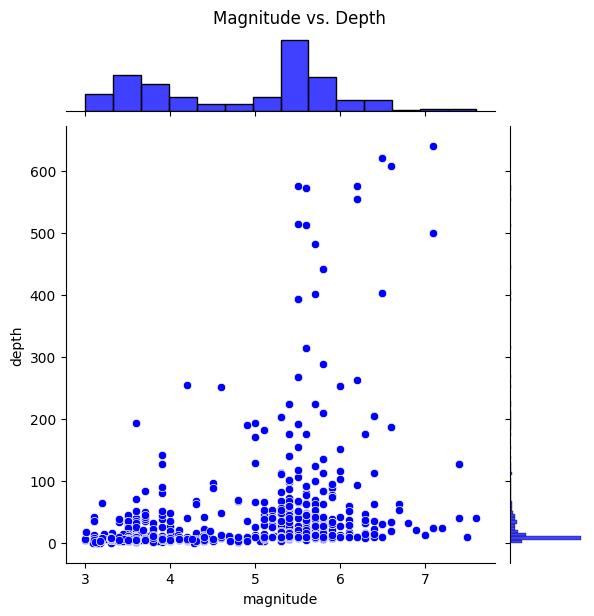

In [8]:
#using scatter plot to find correlation between magnitude and depth of all earth quakes.
sns.jointplot(x='magnitude', y='depth', data=data, kind='scatter', color='blue')
plt.suptitle('Magnitude vs. Depth', y=1.02)
plt.show()

There is no linear relationship between magnitude and depth of earthquakes, however we can conclude that all earthquakes with depth more than 300km has magnitude of more than 5.0

#Depth distribution

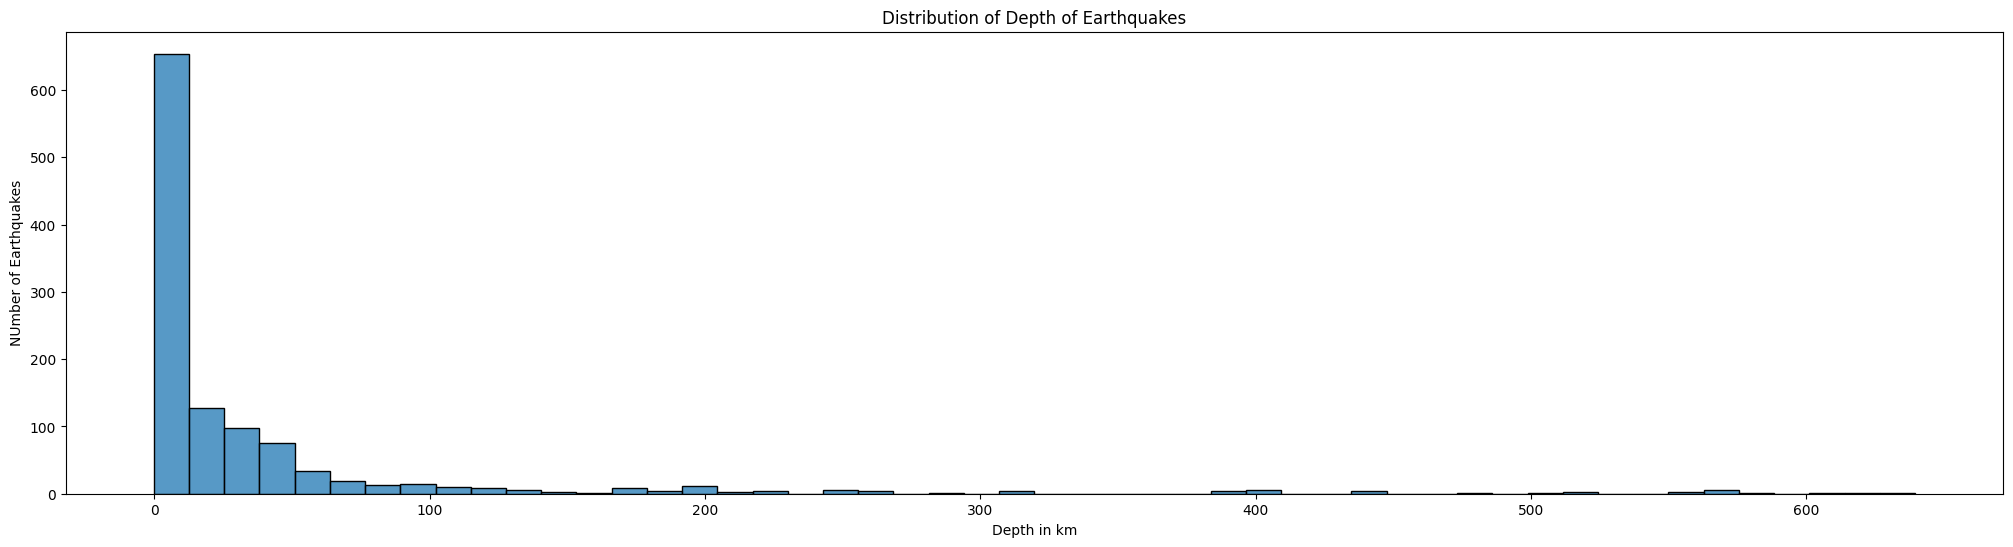

In [9]:
#visualizing depth of eathquakes with bar chart
plt.figure(figsize=(25, 6))
sns.histplot(data['depth'], bins=50)
plt.title('Distribution of Depth of Earthquakes')
plt.xlabel('Depth in km')
plt.ylabel('NUmber of Earthquakes')
plt.show()

In [14]:
depth_under_20 = data[data['depth'] <= 20]
proportion_20 = len(depth_under_20) / len(data)
print(f"Proportion of earthquakes with depth less than or equal to 20 km: {proportion_20:.2%}")

Proportion of earthquakes with depth less than or equal to 20 km: 66.31%


majority of eathquakes have shallow depth.

#Magnitude distribution

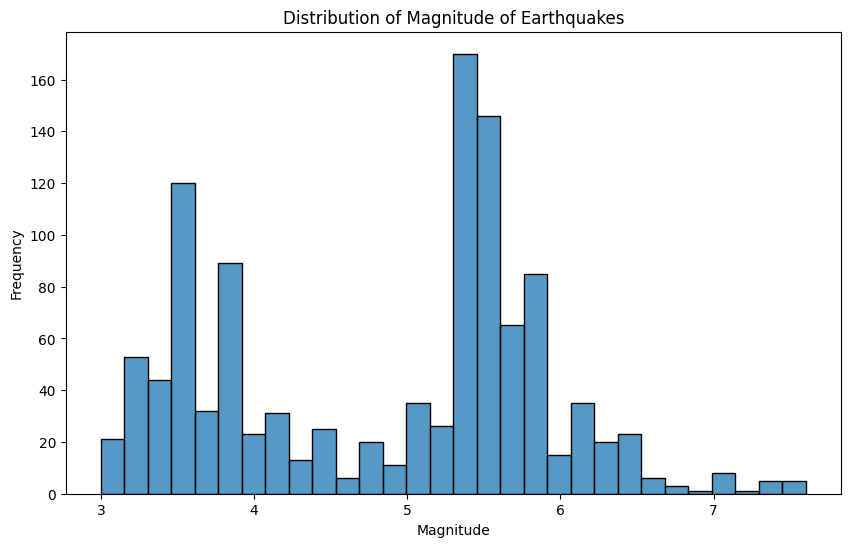

In [10]:
#visualizing Magnitude of eathquakes with bar chart
plt.figure(figsize=(10, 6))
sns.histplot(data['magnitude'], bins=30)
plt.title('Distribution of Magnitude of Earthquakes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

In [15]:
magnitude_info = data['magnitude'].describe()
print(magnitude_info)

count    1137.000000
mean        4.856675
std         1.047840
min         3.000000
25%         3.800000
50%         5.300000
75%         5.600000
max         7.600000
Name: magnitude, dtype: float64


#Top 20 earthquake based on Magnitude

In [11]:
#list of top 20 earth quakes with highest intensity
top_20 = data.sort_values(by = 'magnitude', ascending = False).head(20).reset_index()
top_20 = top_20[['id', 'magnitude','title', 'type', 'date', 'tsunami', 'geometryType', 'depth', 'latitude', 'longitude', 'place', 'location']]
top_20


,id,magnitude,title,type,date,tsunami,geometryType,depth,latitude,longitude,place,location
0,us7000lff4,7.6,"M 7.6 - 19 km E of Gamut, Philippines",earthquake,2023-12-02,1,Point,40.000,8.5266,126.4490,"19 km E of Gamut, Philippines","Gamut, Philippines"
1,us6000m0xl,7.5,"M 7.5 - 2024 Noto Peninsula, Japan Earthquake",earthquake,2024-01-01,1,Point,10.000,37.4976,137.2420,"2024 Noto Peninsula, Japan Earthquake","2024 Noto Peninsula, Japan Earthquake"
2,us6000m0xl,7.5,"M 7.5 - 2024 Noto Peninsula, Japan Earthquake",earthquake,2024-01-01,1,Point,10.000,37.4976,137.2420,"2024 Noto Peninsula, Japan Earthquake","2024 Noto Peninsula, Japan Earthquake"
3,us6000m0xl,7.5,"M 7.5 - 2024 Noto Peninsula, Japan Earthquake",earthquake,2024-01-01,1,Point,10.000,37.4976,137.2420,"2024 Noto Peninsula, Japan Earthquake","2024 Noto Peninsula, Japan Earthquake"
4,us6000m0xl,7.5,"M 7.5 - 2024 Noto Peninsula, Japan Earthquake",earthquake,2024-01-01,1,Point,10.000,37.4976,137.2420,"2024 Noto Peninsula, Japan Earthquake","2024 Noto Peninsula, Japan Earthquake"
5,us7000n05d,7.4,"M 7.4 - 41 km ESE of San Pedro de Atacama, Chile",earthquake,2024-07-19,1,Point,127.291,-23.1243,-67.8715,"41 km ESE of San Pedro de Atacama, Chile","San Pedro de Atacama, Chile"
6,us7000n05d,7.4,"M 7.4 - 41 km ESE of San Pedro de Atacama, Chile",earthquake,2024-07-19,1,Point,127.291,-23.1243,-67.8715,"41 km ESE of San Pedro de Atacama, Chile","San Pedro de Atacama, Chile"
7,us7000m9g4,7.4,"M 7.4 - 15 km S of Hualien City, Taiwan",earthquake,2024-04-02,1,Point,40.000,23.8190,121.5620,"15 km S of Hualien City, Taiwan","Hualien City, Taiwan"
8,us7000m9g4,7.4,"M 7.4 - 15 km S of Hualien City, Taiwan",earthquake,2024-04-02,1,Point,40.000,23.8190,121.5620,"15 km S of Hualien City, Taiwan","Hualien City, Taiwan"
9,us7000n05d,7.4,"M 7.4 - 41 km ESE of San Pedro de Atacama, Chile",earthquake,2024-07-19,1,Point,127.291,-23.1243,-67.8715,"41 km ESE of San Pedro de Atacama, Chile","San Pedro de Atacama, Chile"


Earthquakes per Year

In [ ]:
data['year'].value_counts()

,count
year,
2024,820
2023,317


There is yet 4 month to complete 2024, still year 2024 has experienced more than twice the eathquakes compared to 2023 indicating substanstial increased in siesmic activity in 2024.

#Earthquakes  per month

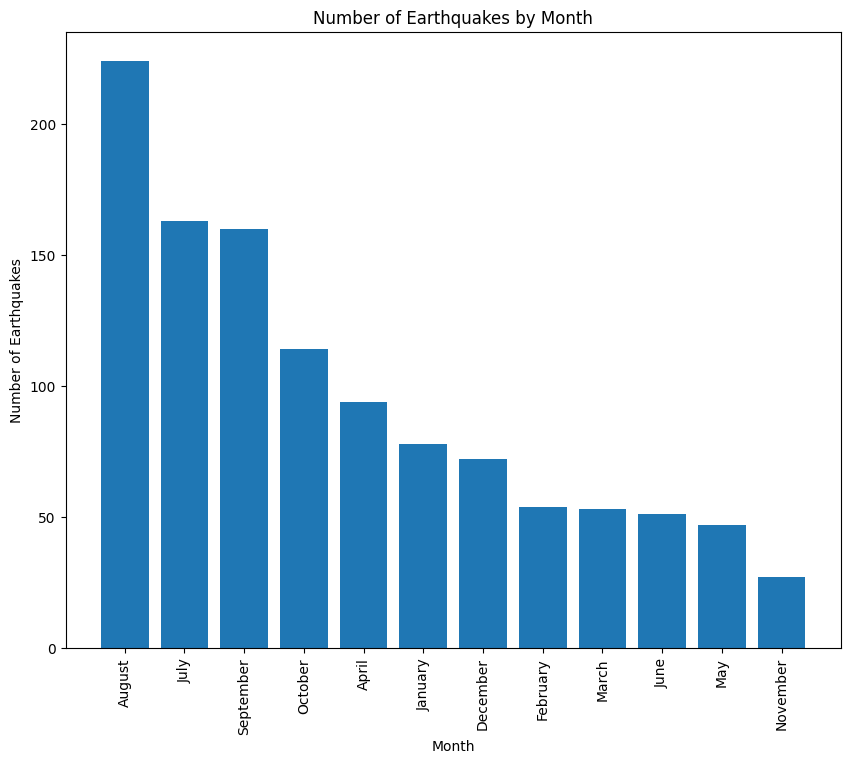

In [12]:
# visualizing eathquakes occurences over the year
plt.figure(figsize=(10,8))
plt.bar(data['month'].value_counts().index, data['month'].value_counts())
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.ylabel('Number of Earthquakes')
plt.title('Number of Earthquakes by Month')
plt.show()

Month of Jul, August and september is where majority of eathquakes has occured indicating some kind of seasonality with Earthquakes

#Total number of Tsunami related earthquakes

In [ ]:
data['tsunami'].value_counts()

,count
tsunami,
0,1069
1,68


In [21]:
Tsunami_eathquakes = data[data['tsunami'] == 1]
proportion_Tsunami = len(Tsunami_eathquakes) / len(data)
print(f"Proportion of earthquakes that are tsunami related: {proportion_Tsunami:.2%}")


Proportion of earthquakes that are tsunami related: 5.98%


#Magnitude of earthquakes accompanied by Tsunami

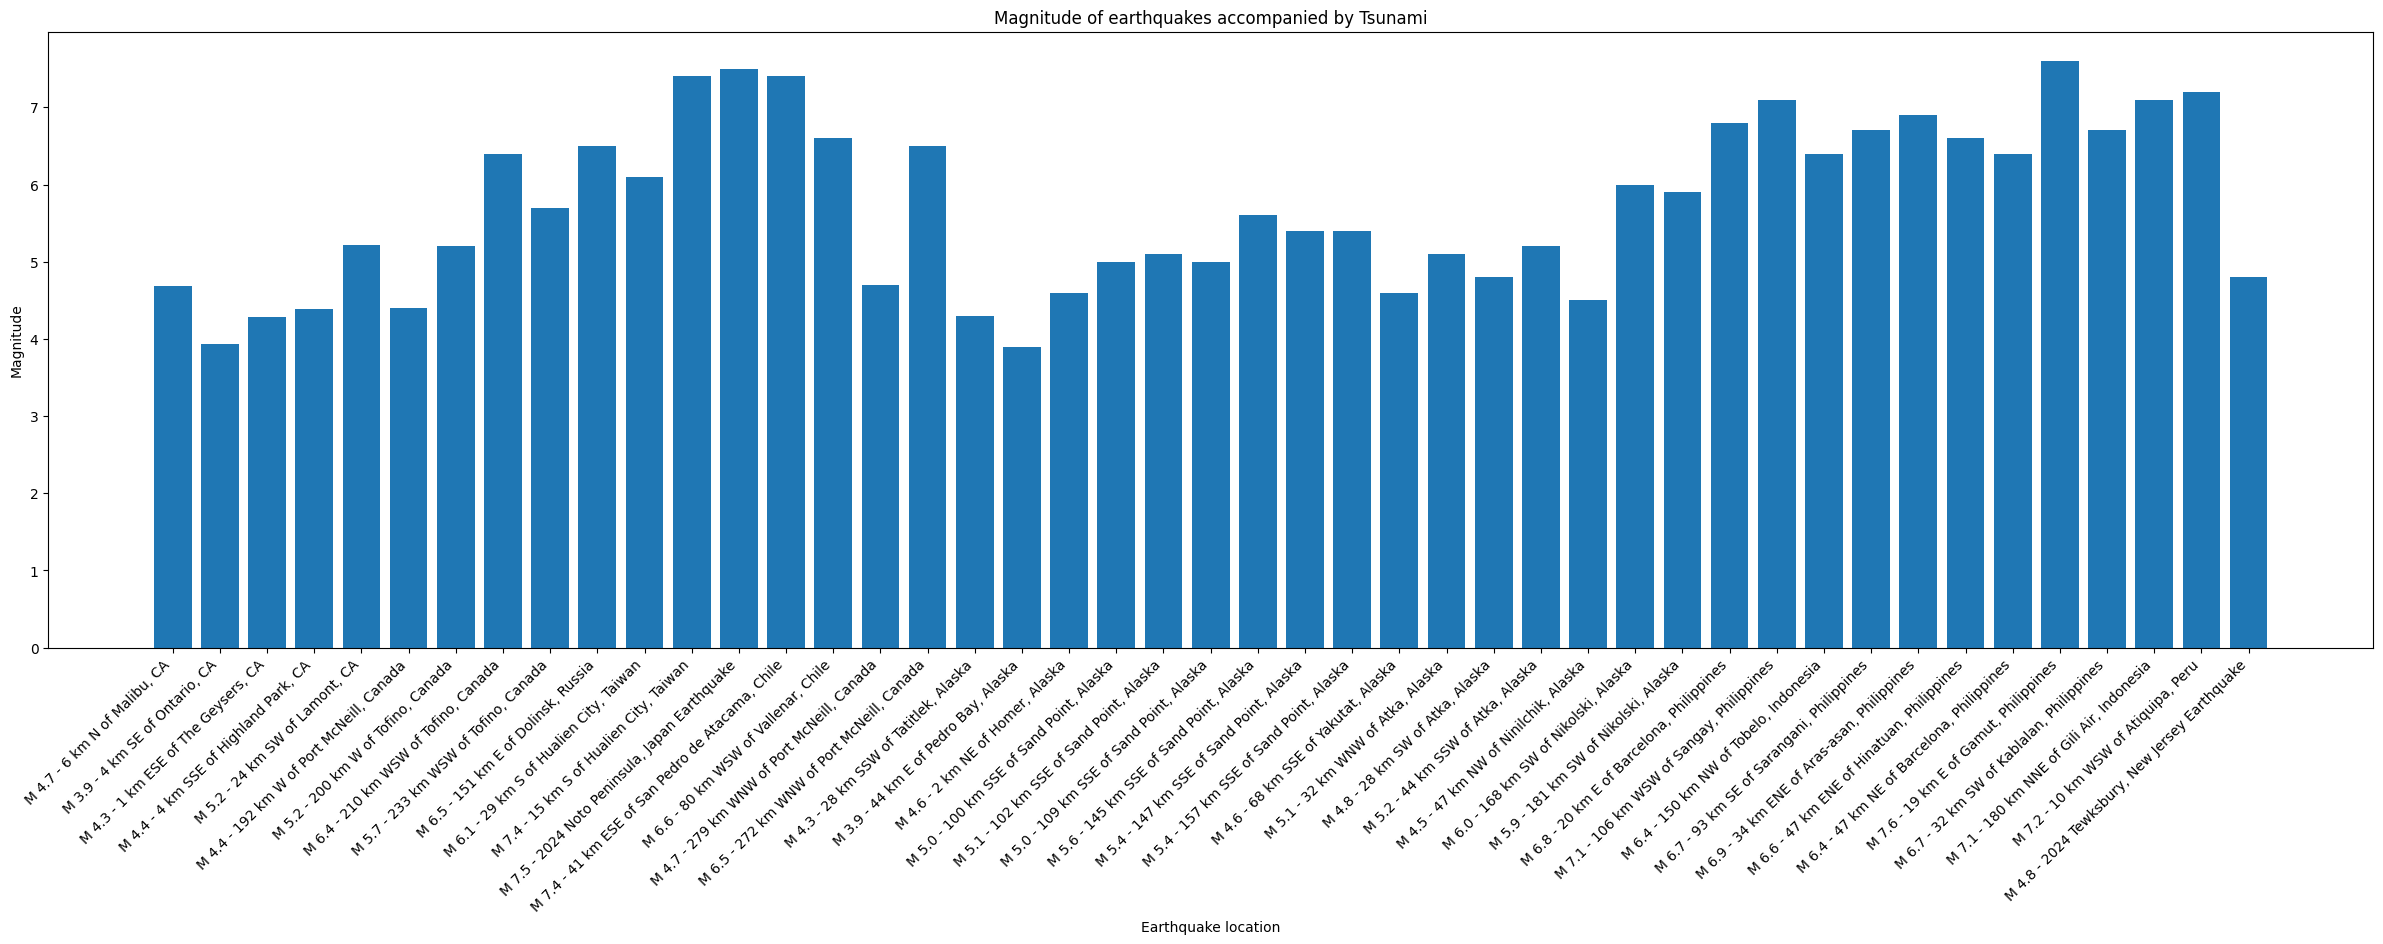

In [18]:

#visualizing magnitude of earthquakes that also induced tsunami
plt.figure(figsize=(30, 8))


tsunami_data = data[data['tsunami'] == 1]
x = tsunami_data['title']

plt.bar(x, tsunami_data['magnitude'])
plt.xlabel('Earthquake location')
plt.ylabel('Magnitude')
plt.title('Magnitude of earthquakes accompanied by Tsunami')


plt.xticks(rotation=45, ha='right')
plt.show()

In [20]:
proportions_magnitude = tsunami_data['magnitude'].describe()
print(proportions_magnitude)

count    68.000000
mean      5.799118
std       1.135605
min       3.900000
25%       4.700000
50%       5.800000
75%       6.625000
max       7.600000
Name: magnitude, dtype: float64


67 out 68 Tsunami accopanied eathquakes have more than 4.0 magintude.